<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/tr/ResNet50_VGG16_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


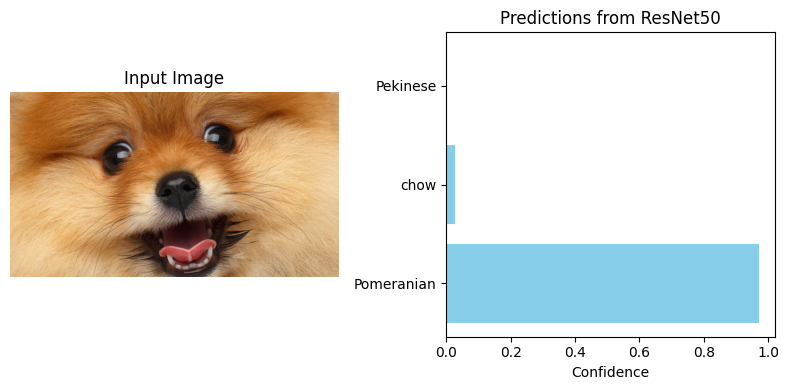

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step


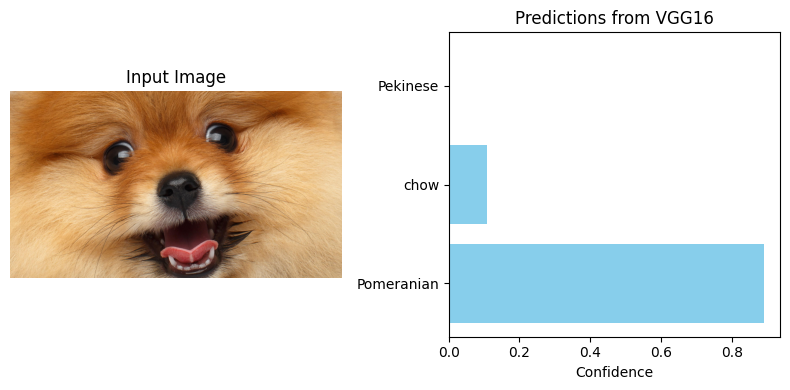

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


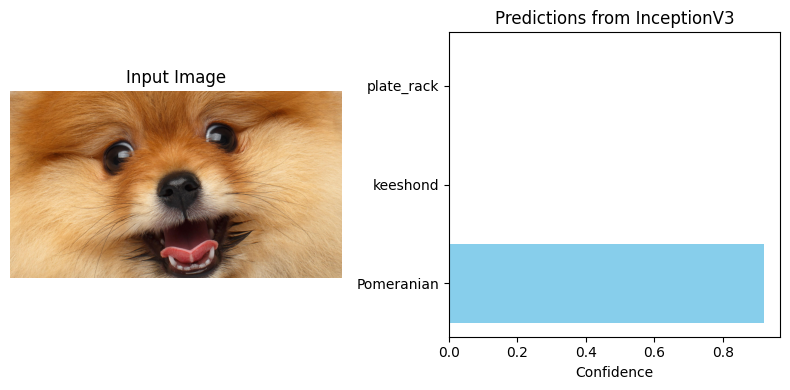

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_inception
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Funkcja ładowania i wstępnego przetwarzania obrazu
def load_and_preprocess_image(image_path, target_size, preprocess_function):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_function(img_array)
    return img_array

# Funkcja dekodowania i wizualizacji wyników predykcji
def decode_and_visualize_predictions(predictions, model_name, original_image):
    decoded = tf.keras.applications.imagenet_utils.decode_predictions(predictions, top=3)

    # Wyciągnięcie etykiet i prawdopodobieństw
    labels = [item[1] for item in decoded[0]]
    scores = [item[2] for item in decoded[0]]

    # Wyświetlenie obrazu
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.axis('off')
    plt.title("Input Image")

    # Wykres słupkowy wyników
    plt.subplot(1, 2, 2)
    plt.barh(labels, scores, color='skyblue')
    plt.xlabel('Confidence')
    plt.title(f'Predictions from {model_name}')
    plt.tight_layout()
    plt.show()

# Ścieżka do przykładowego obrazu
image_path = "dog_68.jpg"  # Upewnij się, że obraz znajduje się w tym miejscu
original_image = load_img(image_path)

# **Model 1: ResNet50**
model_resnet = ResNet50(weights='imagenet')
image_resnet = load_and_preprocess_image(image_path, target_size=(224, 224), preprocess_function=preprocess_resnet)
predictions_resnet = model_resnet.predict(image_resnet)
decode_and_visualize_predictions(predictions_resnet, "ResNet50", original_image)

# **Model 2: VGG16**
model_vgg = VGG16(weights='imagenet')
image_vgg = load_and_preprocess_image(image_path, target_size=(224, 224), preprocess_function=preprocess_vgg)
predictions_vgg = model_vgg.predict(image_vgg)
decode_and_visualize_predictions(predictions_vgg, "VGG16", original_image)

# **Model 3: InceptionV3**
model_inception = InceptionV3(weights='imagenet')
image_inception = load_and_preprocess_image(image_path, target_size=(299, 299), preprocess_function=preprocess_inception)
predictions_inception = model_inception.predict(image_inception)
decode_and_visualize_predictions(predictions_inception, "InceptionV3", original_image)
